In [1]:
from urban_growth.simulator_refactor import *
from urban_growth.estimator_refactor import *
from urban_growth.mixture_estimator import *
from matplotlib import pyplot as plt
from scipy.spatial import distance
%matplotlib inline

In [19]:
# Initial Configuration
L = 100
rho = .47
blur = 4

# model type
model = 'linear_mixture'

# rural-to-urban threshold
T_vec = [100]

# dynamical parameters

pars = {'alpha' : np.array([.3, .3]),
        'pi'    : np.array([.4, .6]),
      # 'beta'  : np.array([-9, -11])
        'gamma' : np.array([3.0, 2.8])
       }


In [20]:
M0 = random_mat(L, rho, blur = blur)
m = simulator(M0 = M0)

M1 = m.dynamics(T_vec = T_vec,
                model = model, 
                n_iters = 1, 
                verbose = True,  
                return_type = 'plain',
                **pars)

Step 1 completed


In [21]:
e = mixture_estimator(M0 = M0)
X = M1 - e.get_M0()
X[e.get_M0() == 1] = np.nan

e.partition_clusters(T_vec)
e.distance_variables()

In [22]:
e.make_dist_array(trunc = 50)

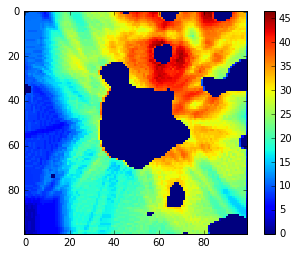

In [31]:
M = e.dist_array_feature(.5)
plt.imshow(M[0], interpolation = 'nearest') 
plt.colorbar()

In [5]:
to_viz = np.zeros(e.get_M0().shape)
to_viz[e.get_M0() == 0] = np.nan
to_viz[e.get_M0() == 1] = 1
to_viz[X == 1] = 2

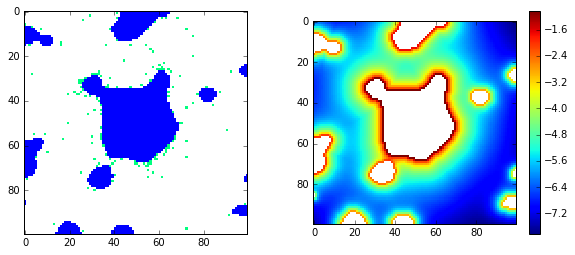

In [6]:
to_viz = np.zeros(e.get_M0().shape)
to_viz[e.get_M0() == 0] = np.nan
to_viz[e.get_M0() == 1] = 1
to_viz[X == 1] = 2

Y = models[model]['density'](e, **pars)

f, axarr = plt.subplots(1, 2, figsize = (10, 4))
im = axarr[1].imshow(np.log(Y), interpolation = 'nearest')
plt.colorbar(im)
axarr[0].imshow(to_viz, interpolation = 'nearest', cmap = 'winter')

In [7]:
pars_sub = pars.copy()
pars_sub.pop('pi')
test = linear_components(e, **pars_sub)

In [8]:
test2 = linear_mixture_density(e, **pars)

# EM

In [9]:
alpha = np.random.rand(2)

pi = np.random.rand(2)
pi = pi / pi.sum()

gamma = 2 + 2 * np.random.rand(2)

pars_0 = {
    'alpha' : alpha,
    'pi'    : pi,
    'gamma' : gamma
    }

true_ll = e.log_likelihood(M1, model, normalized = True, **pars)

initial_ll = e.log_likelihood(M1, 
                 model = model, 
                 normalized = True, 
                 **pars_0)


pars_hat, estimated_ll = e.EM(M1, 
                    model, 
                    pars_0, 
                    n_iters = 100, 
                    print_every = 1, 
                    tol = .001)

print initial_ll, estimated_ll, true_ll

# for k in pars_hat:
#     print k + ' : ' + str(np.round(pars_0[k], 2)) + ' , ' + str(np.round(pars_hat[k], 2)) + ' , ' + str(np.round(pars[k], 2))

ll0 : -0.07
0: ll  = -0.07
1: ll  = -0.07
-0.0698615815101 -0.0684331145744 -0.0665140229971


In [10]:
pars_hat

{'alpha': array([ 0.16144202,  0.16348409]),
 'gamma': array([ 2.33096305,  2.58580489]),
 'pi': array([ 0.1541801,  0.8458199])}

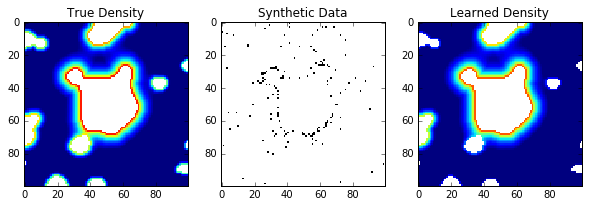

In [11]:
f, axarr = plt.subplots(1, 3, figsize = (10, 4))
im = axarr[0].imshow(np.log(Y), interpolation = 'nearest', vmin = -5, vmax = -.5)
axarr[0].set_title('True Density')

im = axarr[1].imshow(X, interpolation = 'nearest', cmap = 'Greys')
axarr[1].set_title('Synthetic Data')

Y_hat = models[model]['density'](e, 
                                 **pars_hat)
im = axarr[2].imshow(np.log(Y_hat), interpolation = 'nearest', vmin = -5, vmax = -.5)
axarr[2].set_title('Learned Density')

In [12]:
# we're going to test whether the EM solution is in fact a local optimum

pars_test, ll_test, h_test = e.ML(X, model, **pars_hat)

pars_hat, pars_test

({'alpha': array([ 0.16144202,  0.16348409]),
  'gamma': array([ 2.33096305,  2.58580489]),
  'pi': array([ 0.1541801,  0.8458199])},
 {'alpha': array([ 0.36519534,  0.19570396]),
  'gamma': array([ 2.95116634,  2.73019671]),
  'pi': array([ 0.36764774,  0.8429829 ])})

# Brute-Force ML

In [13]:
pars_hat, ll, hess_inv = e.ML(X, model, **pars_0)

In [14]:
pars_hat

{'alpha': array([ 0.57852436,  0.33294593]),
 'gamma': array([ 2.95115747,  2.73020578]),
 'pi': array([ 0.23208028,  0.49550383])}

In [15]:
initial_ll, - ll, true_ll

(-0.069861581510136939, -0.06644000881596542, -0.066514022997133382)

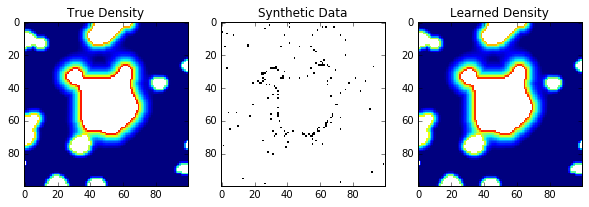

In [16]:
f, axarr = plt.subplots(1, 3, figsize = (10, 4))
im = axarr[0].imshow(np.log(Y), interpolation = 'nearest', vmin = -5, vmax = -.5)
axarr[0].set_title('True Density')

im = axarr[1].imshow(X, interpolation = 'nearest', cmap = 'Greys')
axarr[1].set_title('Synthetic Data')

Y_hat = models[model]['density'](e, 
                                 **pars_hat)
im = axarr[2].imshow(np.log(Y_hat), interpolation = 'nearest', vmin = -5, vmax = -.5)
axarr[2].set_title('Learned Density')